# Breast cancer PSI-MS - Optimization

Import packages

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn import feature_selection
from sklearn.model_selection import StratifiedKFold
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pickle

In [2]:
def performance(diagnosis,prediction):
    result=confusion_matrix(diagnosis,prediction)
    tn,fp,fn,tp=result.ravel()
    accuracy=(tp+tn)/np.sum(result)
    specificity=tn/sum(result[0,:])
    sensitivity=tp/sum(result[1,:])
    print('Accuracy: %.3f Sensitivity: %.3f Specificity: %.3f'%(accuracy,sensitivity,specificity))
    print(tp)
    print(tn)
    return accuracy, specificity, sensitivity

File directory / Filename

In [3]:
Path = r'D:\Breast Cancer PSIMS\Codes and figures'
Filename_train = 'PSIMS_Data_from_Lab.csv'
Filename_external = 'PSIMS_Data_Hospital.csv'
Filename_stage0 = 'PSIMS_Data_Stage0.csv'

Preprocess data

In [4]:
# Read raw file for model construction
Raw_data = pd.read_csv(os.path.join(Path,Filename_train))
OnSite_Data = pd.read_csv(os.path.join(Path,Filename_external))
Stage0_Data = pd.read_csv(os.path.join(Path,Filename_stage0))

# Convert to malignant (1) and benign (0), ignoring subtyping
Raw_data['subtype'] = Raw_data['subtype'].apply(lambda x: np.clip(x,0,1))

# Random split into 2 to 8 (considering label distribution)
x_train_index,x_test_index,y_train,y_test=model_selection.train_test_split(
    Raw_data.index,Raw_data['subtype'],test_size=0.2,random_state=1,stratify=Raw_data['subtype'])

x_train = Raw_data.iloc[x_train_index,2:]
x_test = Raw_data.iloc[x_test_index,2:]

x_external = OnSite_Data.iloc[:,2:]
y_external = OnSite_Data.iloc[:,1]

x_stage0 = Stage0_Data.iloc[:,2:]
y_stage0 = Stage0_Data.iloc[:,1]

Optimize C

In [15]:
#C_all = np.logspace(0,14,15,base=2)
C_all = [1,5,10,25,125,250,750,1000,1500,2500,5000,10000]
result_c=[]

for c in C_all:
    svc=svm.SVC(C=c, kernel='linear',class_weight={0:0.3,1:0.7})
    cv_prediction=model_selection.cross_val_predict(svc,x_train,y_train,cv=5)
    accuracy, specificity, sensitivity=performance(y_train,cv_prediction)
    result_c.append([c, accuracy, specificity, sensitivity])

df_results_c = pd.DataFrame(result_c, columns =['C','Accuracy', 'Specificity', 'Sensitivity'])

Accuracy: 0.715 Sensitivity: 0.000 Specificity: 1.000
Accuracy: 0.715 Sensitivity: 0.000 Specificity: 1.000
Accuracy: 0.715 Sensitivity: 0.000 Specificity: 1.000
Accuracy: 0.757 Sensitivity: 0.195 Specificity: 0.981
Accuracy: 0.812 Sensitivity: 0.732 Specificity: 0.845
Accuracy: 0.819 Sensitivity: 0.756 Specificity: 0.845
Accuracy: 0.847 Sensitivity: 0.780 Specificity: 0.874
Accuracy: 0.854 Sensitivity: 0.780 Specificity: 0.883
Accuracy: 0.882 Sensitivity: 0.805 Specificity: 0.913
Accuracy: 0.882 Sensitivity: 0.805 Specificity: 0.913
Accuracy: 0.882 Sensitivity: 0.805 Specificity: 0.913
Accuracy: 0.875 Sensitivity: 0.805 Specificity: 0.903


In [20]:
df_results_c.sort_values(by='Accuracy',ascending=False, ignore_index=True,inplace=True)
df_results_c.head()

1500

Optimize number of features

In [15]:
result_feature=[]

for i in range(5,500,5):
    svc=svm.SVC(C=1500, kernel='linear',class_weight={0:0.3,1:0.7})
    svc=feature_selection.RFE(svc,n_features_to_select=i)
    cv_prediction=model_selection.cross_val_predict(svc,x_train,y_train,cv=5)
    accuracy, specificity, sensitivity=performance(y_train,cv_prediction)
    result_feature.append([i, accuracy, specificity, sensitivity])

df_results_feature = pd.DataFrame(result_feature, columns =['Features','Accuracy', 'Specificity', 'Sensitivity'])

Accuracy: 0.826 Sensitivity: 0.756 Specificity: 0.854
Accuracy: 0.819 Sensitivity: 0.683 Specificity: 0.874
Accuracy: 0.840 Sensitivity: 0.707 Specificity: 0.893
Accuracy: 0.840 Sensitivity: 0.732 Specificity: 0.883
Accuracy: 0.847 Sensitivity: 0.732 Specificity: 0.893
Accuracy: 0.854 Sensitivity: 0.732 Specificity: 0.903
Accuracy: 0.861 Sensitivity: 0.756 Specificity: 0.903
Accuracy: 0.868 Sensitivity: 0.780 Specificity: 0.903
Accuracy: 0.868 Sensitivity: 0.780 Specificity: 0.903
Accuracy: 0.868 Sensitivity: 0.780 Specificity: 0.903
Accuracy: 0.868 Sensitivity: 0.780 Specificity: 0.903
Accuracy: 0.875 Sensitivity: 0.805 Specificity: 0.903
Accuracy: 0.875 Sensitivity: 0.805 Specificity: 0.903
Accuracy: 0.875 Sensitivity: 0.805 Specificity: 0.903
Accuracy: 0.875 Sensitivity: 0.805 Specificity: 0.903
Accuracy: 0.875 Sensitivity: 0.805 Specificity: 0.903
Accuracy: 0.875 Sensitivity: 0.805 Specificity: 0.903
Accuracy: 0.868 Sensitivity: 0.805 Specificity: 0.893
Accuracy: 0.875 Sensitivity:

In [17]:
df_results_feature.sort_values(by=['Accuracy','Features'],ascending=[False,True], inplace=True)
df_results_feature.head(50)

,Features,Accuracy,Specificity,Sensitivity
56,285,0.881944,0.912621,0.804878
57,290,0.881944,0.912621,0.804878
58,295,0.881944,0.912621,0.804878
59,300,0.881944,0.912621,0.804878
60,305,0.881944,0.912621,0.804878
61,310,0.881944,0.912621,0.804878
62,315,0.881944,0.912621,0.804878
63,320,0.881944,0.912621,0.804878
64,325,0.881944,0.912621,0.804878
65,330,0.881944,0.912621,0.804878


Plot optimization figures

In [64]:
# C optimization
df_results_c.sort_values(by='C',ascending=True, inplace=True)
fig = go.Figure()

# Plot trend
fig.add_trace(go.Scatter(x=df_results_c['C'], y=df_results_c['Sensitivity']*100,name='Sensitivity',
                        line={'color':'#F4A016','width':5},marker={'size':10}))
fig.add_trace(go.Scatter(x=df_results_c['C'], y=df_results_c['Specificity']*100,name='Specificity',
                        line={'color':'#157B3A','width':5},marker={'size':10}))
fig.add_trace(go.Scatter(x=df_results_c['C'], y=df_results_c['Accuracy']*100,name='Accuracy',
                        line={'color':'#A63354','width':5},marker={'size':10}))
fig.add_trace(go.Scatter(x=[1500,1500], y=[0,100], mode='lines',
                         line={'dash':'dash','color':'black','width':3},showlegend=False))

# Some aesthetical adjustments to layout
fig.update_xaxes(type="log")
fig.update_layout(autosize=False,width=550,height=370,font=dict(size=14), template='simple_white',
                 legend=dict(yanchor="bottom", y=0.05,xanchor="right",x=1.1, bordercolor="Black",borderwidth=1))
fig.show()
fig.write_image(os.path.join(Path,'C optimization.png'),scale=3)
plt.close()

In [63]:
df_results_feature.sort_values(by='Features',ascending=True, inplace=True)

fig = make_subplots(rows=2, cols=1, vertical_spacing = 0.15, row_heights=[3.5,1])
cut_interval = [10, 65]

# Plot trend
fig.add_trace(go.Scatter(x=df_results_feature['Features'], y=df_results_feature['Sensitivity']*100,name='Sensitivity',
                        line={'color':'#F4A016','width':5},marker={'size':10}), row=1, col=1)
fig.add_trace(go.Scatter(x=df_results_feature['Features'], y=df_results_feature['Specificity']*100,name='Specificity',
                        line={'color':'#157B3A','width':5},marker={'size':10}), row=1, col=1)
fig.add_trace(go.Scatter(x=df_results_feature['Features'], y=df_results_feature['Accuracy']*100,name='Accuracy',
                        line={'color':'#A63354','width':5},marker={'size':10}), row=1, col=1)
fig.add_trace(go.Scatter(x=[60,60], y=[0,100], mode='lines',
                         line={'dash':'dash','color':'black','width':3},showlegend=False), row=1, col=1)
fig.add_trace(go.Scatter(x=[60,60], y=[0,100], mode='lines',
                         line={'dash':'dash','color':'black','width':3},showlegend=False), row=2, col=1)
# Some aesthetical adjustments to layout
fig.update_yaxes(range=[cut_interval[1], 100], row=1, col=1)
fig.update_xaxes(range=[0,500],visible=False, row=1, col=1)
fig.update_yaxes(range=[0, cut_interval[0]], row=2, col=1)
fig.update_xaxes(range=[0,500],row=2, col=1)

fig.update_layout(autosize=False,width=550,height=350,font=dict(size=14), template='simple_white',
                 legend=dict(yanchor="bottom", y=0.05,xanchor="right",x=1, bordercolor="Black",borderwidth=1))
fig.show()
fig.write_image(os.path.join(Path,'N feature optimization.png'),scale=3)
plt.close()

ROC curve

In [5]:
# Run classifier with cross-validation and plot ROC curves
svc=svm.SVC(C=1500, kernel='linear',class_weight={0:0.3,1:0.7}, probability=True)
svc=feature_selection.RFE(svc,n_features_to_select=60)

cv = StratifiedKFold(n_splits=5)

tprs,aucs = [],[]
mean_fpr = np.linspace(0, 1, 100)

for i, (train, test) in enumerate(cv.split(x_train, y_train)):
    svc.fit(x_train.iloc[train,:], y_train.iloc[train])
    y_pred_prob = svc.predict_proba(x_train.iloc[test,:])
    fpr, tpr, _ = roc_curve(y_train.iloc[test],y_pred_prob[:,1])
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(auc(mean_fpr,interp_tpr))

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1]=1
std_tpr = np.std(tprs, axis=0)
mean_auc = np.mean(aucs)
std_auc = np.std(aucs)

In [7]:
print(mean_auc)
print(std_auc)

0.928030303030303
0.05375289325527446


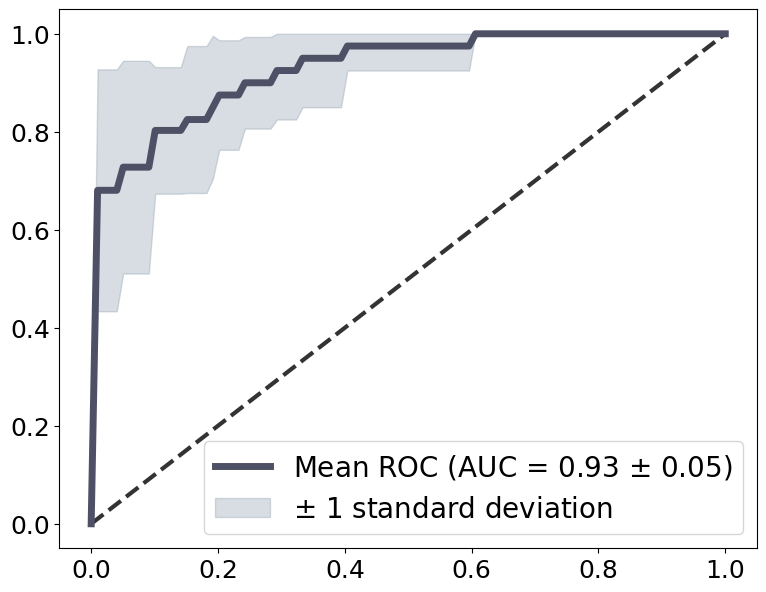

In [6]:
fig, ax = plt.subplots(figsize=(9,7))
ax.plot([0, 1], [0, 1], linestyle="--", lw=3, color="k", alpha=0.8)
ax.plot(mean_fpr, mean_tpr, color="#4E5166",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=5, alpha=1)

tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

ax.fill_between(mean_fpr, tprs_lower, tprs_upper,
                color="#7C90A0", alpha=0.3, label=r"$\pm$ 1 standard deviation")
ax.legend(loc="lower right", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()
#fig.savefig(os.path.join(Path,'Model ROC curve.tif'), dpi=120)
plt.close()

Final model performance

In [7]:
svc=svm.SVC(C=1500, kernel='linear', class_weight={0:0.3,1:0.7})
svc=feature_selection.RFE(svc,n_features_to_select=60)

cv_prediction=model_selection.cross_val_predict(svc,x_train,y_train,cv=5)
print('5-fold cross validation results:')
print('Total: '+str(len(y_train))+', Malignant: '+str(sum(y_train))+', Benign: '+str(len(y_train)-sum(y_train)))
accuracy, specificity, sensitivity=performance(y_train,cv_prediction)
print('-'*50)
      
svc=svc.fit(x_train,y_train)

# Predict validation set
validation_prediction=svc.predict(x_test)
print('Validation set results:')
print('Total: '+str(len(y_test))+', Malignant: '+str(sum(y_test))+', Benign: '+str(len(y_test)-sum(y_test)))

validation_result=performance(y_test,validation_prediction)
print('-'*50)

print('On-site results:')
print('Total: '+str(len(y_external))+', Malignant: '+str(sum(y_external))+', Benign: '+str(len(y_external)-sum(y_external)))
External_prediction=svc.predict(x_external)
External_result=performance(y_external,External_prediction)
print('-'*50)
      

print('Stage 0 results:')
print('Total: '+str(len(y_stage0)))
Stage0_prediction = svc.predict(x_stage0)
Stage0_result = performance(y_stage0, Stage0_prediction)

5-fold cross validation results:
Total: 144, Malignant: 41, Benign: 103
Accuracy: 0.875 Sensitivity: 0.805 Specificity: 0.903
33
93
--------------------------------------------------
Validation set results:
Total: 36, Malignant: 10, Benign: 26
Accuracy: 0.889 Sensitivity: 0.800 Specificity: 0.923
8
24
--------------------------------------------------
On-site results:
Total: 512, Malignant: 153, Benign: 359
Accuracy: 0.844 Sensitivity: 0.830 Specificity: 0.850
127
305
--------------------------------------------------
Stage 0 results:
Total: 28
Accuracy: 0.786 Sensitivity: 0.786 Specificity: nan
22
0


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  """


Weighting

In [8]:
mz = np.arange(501.5,995.5,1)
select = svc.support_
df_Weighting = pd.DataFrame({"m/z":mz[select], "Weight":svc.estimator_.coef_[0]})
df_Weighting.to_excel(os.path.join(Path,'Weighting.xlsx'))

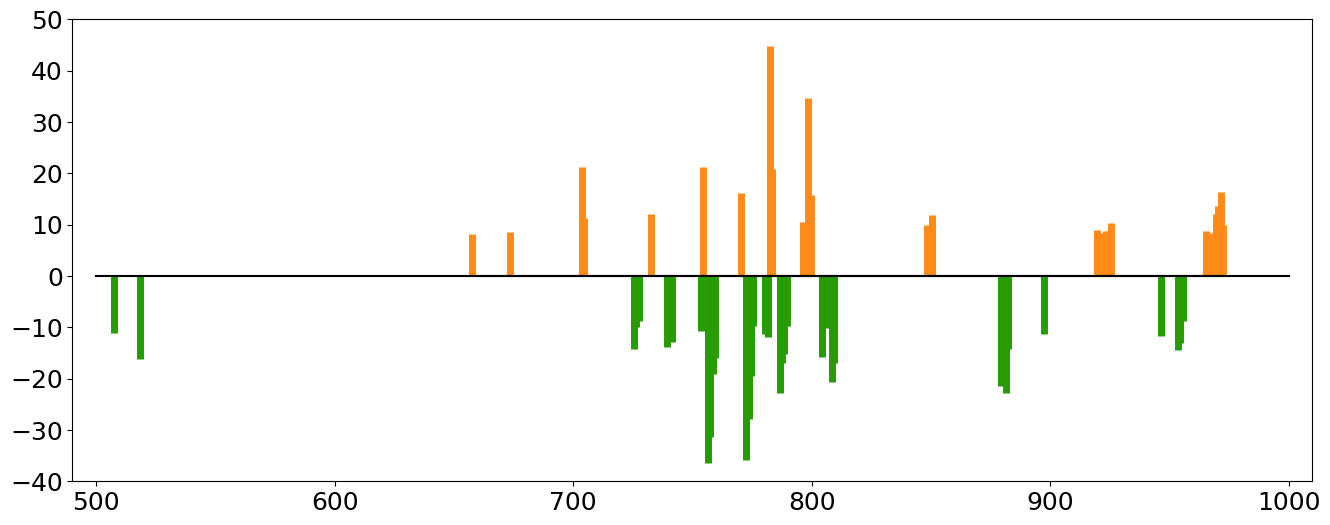

In [7]:
fig = plt.figure(figsize=(16,6)) # Create figure
markerline1, stemlines1, baseline1 = plt.stem(df_Weighting.loc[df_Weighting["Weight"]>0,"m/z"],
                                              df_Weighting.loc[df_Weighting["Weight"]>0,"Weight"], 
                                              linefmt='#ff8a17',markerfmt='None',basefmt='k')
markerline2, stemlines2, baseline2 = plt.stem(df_Weighting.loc[df_Weighting["Weight"]<0,"m/z"], 
                                              df_Weighting.loc[df_Weighting["Weight"]<0,"Weight"],
                                              linefmt='#269c00',markerfmt='None',basefmt='k')
plt.setp(stemlines1, 'linewidth', 5)
plt.setp(stemlines2, 'linewidth', 5)
baseline2.set_xdata([500,1000])
plt.ylim([-40,50])
plt.xlim([490,1010])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()
#fig.savefig(os.path.join(Path,'Weighting.tif'), dpi=120)
plt.close()

Save model

In [44]:
pickle.dump(svc, open(os.path.join(Path,'Model.pkl'), 'wb'))
#svc = pickle.load(open(os.path.join(Path,'Model.pkl'), 'rb'))